In [1]:
import pandas as pd
import math as mat
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import scipy.stats as st

In [3]:
batters_all = pd.read_csv('batters_2024.csv')
starters = pd.read_csv('starters_2024.csv')
relievers = pd.read_csv('relievers_2024.csv')

datasets = [batters_all, starters, relievers]

In [4]:
batters_all.columns

Index(['POS', 'First Name', 'Last Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'K's', 'CON vL', 'GAP vL', 'POW vL', 'EYE vL', 'K vL', 'CON vR',
       'GAP vR', 'POW vR', 'EYE vR', 'K vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

In [5]:
for x in datasets:
    x.columns = x.columns.str.strip().str.replace("'", '').str.replace(' ', '_')

In [6]:
batters_all.columns

Index(['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'Ks', 'CON_vL', 'GAP_vL', 'POW_vL', 'EYE_vL', 'K_vL', 'CON_vR',
       'GAP_vR', 'POW_vR', 'EYE_vR', 'K_vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

We need to delete the last row - it's not needed.

In [7]:
batters_all = batters_all.drop(batters_all.index[-1])
starters = starters.drop(starters.index[-1])
relievers = relievers.drop(relievers.index[-1])

In [8]:
batters_all.columns

Index(['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'EXP', 'CON', 'GAP', 'POW',
       'EYE', 'Ks', 'CON_vL', 'GAP_vL', 'POW_vL', 'EYE_vL', 'K_vL', 'CON_vR',
       'GAP_vR', 'POW_vR', 'EYE_vR', 'K_vR', 'BFH', 'SPE', 'STE', 'RUN', 'GS',
       'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'R', 'BB', 'IBB', 'HP',
       'SO', 'GDP', 'EBH', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC+', 'WAR',
       'SB', 'CS', 'SB%', 'SLR'],
      dtype='object')

In [9]:
batters_all_ratings = batters_all.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'B', 'CON', 'GAP', 'POW',
       'EYE', 'Ks','BFH', 'SPE', 'STE', 'RUN']]

In [10]:
sns.set(rc={'figure.figsize':(16,8)})

In [11]:
batters_all_ratbox = batters_all_ratings.drop(['POS', 'First_Name', 'Last_Name', 'TM', 'B'], axis=1)

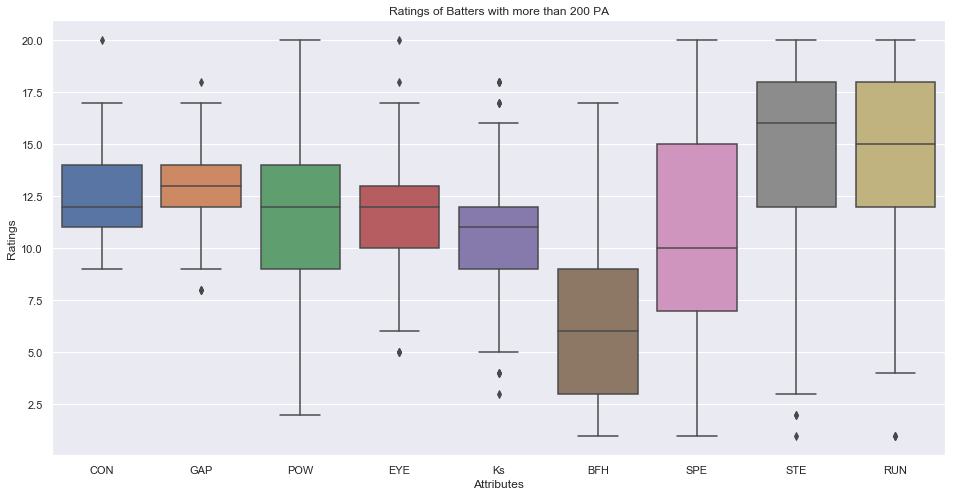

In [12]:
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_ratbox))
plt.xlabel('Attributes')
plt.ylabel('Ratings')
plt.title('Ratings of Batters with more than 200 PA')
plt.show(fig)

In [13]:
batters_all_stats = batters_all.loc[:,['POS', 'First_Name', 'Last_Name', 'TM', 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP']]

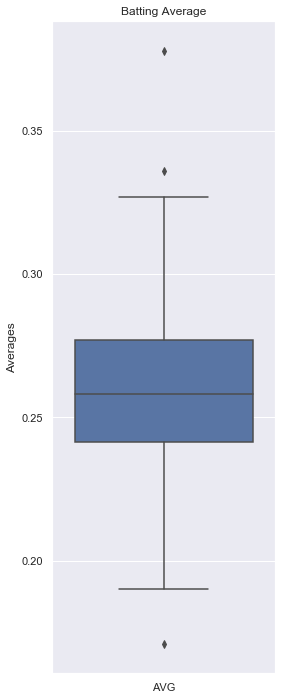

In [19]:
batters_all_statbox = batters_all_stats.loc[:,['AVG']]
sns.set(rc={'figure.figsize':(4,12)})
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_statbox))
plt.xlabel('')
plt.ylabel('Averages')
plt.title('Batting Average')
plt.show(fig)

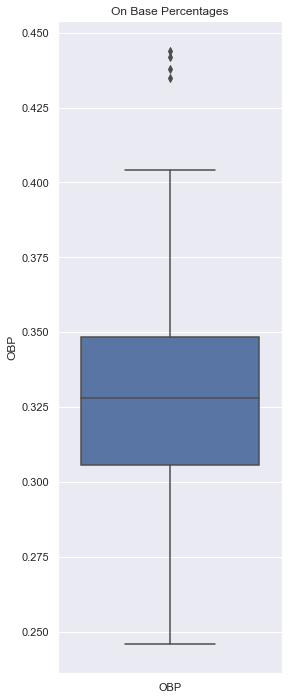

In [20]:
batters_all_statbox = batters_all_stats.loc[:,['OBP']]
sns.set(rc={'figure.figsize':(4,12)})
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_statbox))
plt.xlabel('')
plt.ylabel('OBP')
plt.title('On Base Percentages')
plt.show(fig)

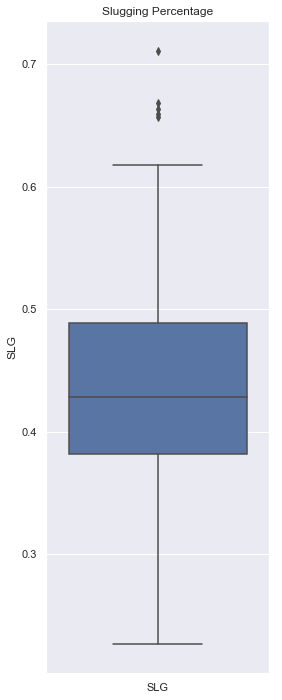

In [21]:
batters_all_statbox = batters_all_stats.loc[:,['SLG']]
sns.set(rc={'figure.figsize':(4,12)})
fig = sns.boxplot(x ="variable", y = "value", data=pd.melt(batters_all_statbox))
plt.xlabel('')
plt.ylabel('SLG')
plt.title('Slugging Percentage')
plt.show(fig)

### How Rare is each attribute

In [30]:
ratings = list(range(21))
column_ratings = ['CON', 'GAP', 'POW', 'EYE', 'Ks', 'BFH', 'SPE', 'STE', 'RUN']
rarity = {}
ratings_rarity = {}

In [38]:
for a in column_ratings:
    mean = batters_all_ratbox[a].mean()
    dev = batters_all_ratbox[a].std()
    for i in ratings:
        ratings_rarity[i] = st.norm.cdf((i-mean)/dev)
        rarity[col] = [ratings_rarity]

In [39]:
rarity

{'CON': [{0: 0.00016344849645152728,
   1: 0.00040418464883131976,
   2: 0.000945526773483067,
   3: 0.002093316672628827,
   4: 0.004387951480967813,
   5: 0.008713347308040608,
   6: 0.016401105157935855,
   7: 0.02928465407188167,
   8: 0.04964258702574111,
   9: 0.07997413242873691,
   10: 0.12258480410901673,
   11: 0.17902720204937828,
   12: 0.24952182231199282,
   13: 0.3325394086596817,
   14: 0.42472179772535257,
   15: 0.5212356441362177,
   16: 0.6165141923026579,
   17: 0.7052021124102483,
   18: 0.7830411734027517,
   19: 0.8474572675823691,
   20: 0.8977209993528102}],
 'GAP': [{0: 0.00016344849645152728,
   1: 0.00040418464883131976,
   2: 0.000945526773483067,
   3: 0.002093316672628827,
   4: 0.004387951480967813,
   5: 0.008713347308040608,
   6: 0.016401105157935855,
   7: 0.02928465407188167,
   8: 0.04964258702574111,
   9: 0.07997413242873691,
   10: 0.12258480410901673,
   11: 0.17902720204937828,
   12: 0.24952182231199282,
   13: 0.3325394086596817,
   14: 0.4

In [40]:
def percentile_calc(rating):
    mean = batters_all_ratbox[rating].mean()
    dev = batters_all_ratbox[rating].std()
    for i in ratings:
        z_score = ((i-mean)/dev)
        percentile = st.norm.cdf(z_score)
        ratings_rarity[i] = percentile
        return ratings_rarity

In [41]:
for col in column_ratings:
    percentile_calc(col)
    rarity[col] = [ratings_rarity]

In [42]:
percentile_calc('GAP')

{0: 2.0360782940928587e-11,
 1: 0.00040418464883131976,
 2: 0.000945526773483067,
 3: 0.002093316672628827,
 4: 0.004387951480967813,
 5: 0.008713347308040608,
 6: 0.016401105157935855,
 7: 0.02928465407188167,
 8: 0.04964258702574111,
 9: 0.07997413242873691,
 10: 0.12258480410901673,
 11: 0.17902720204937828,
 12: 0.24952182231199282,
 13: 0.3325394086596817,
 14: 0.42472179772535257,
 15: 0.5212356441362177,
 16: 0.6165141923026579,
 17: 0.7052021124102483,
 18: 0.7830411734027517,
 19: 0.8474572675823691,
 20: 0.8977209993528102}